In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [58]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\colinearity.csv")
df.head()

,x1,x2,x3,x4,y
0,-1.109823,-1.172554,-0.897949,-6.572526,-158.193913
1,0.288381,0.360526,2.298690,3.884887,198.312926
2,-1.059194,0.833067,0.285517,-1.225931,12.152087
3,0.226017,1.979367,0.744038,5.380823,190.281938
4,0.664165,-1.373739,0.317570,-0.437413,-72.681681


In [59]:
X = df.drop(columns="y")
y = df.y

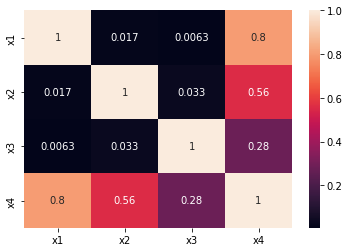

In [60]:
corr = X.corr()
sns.heatmap(corr, annot=True)
# corr.style.background_gradient(cmap="YlOrRd")
plt.show()

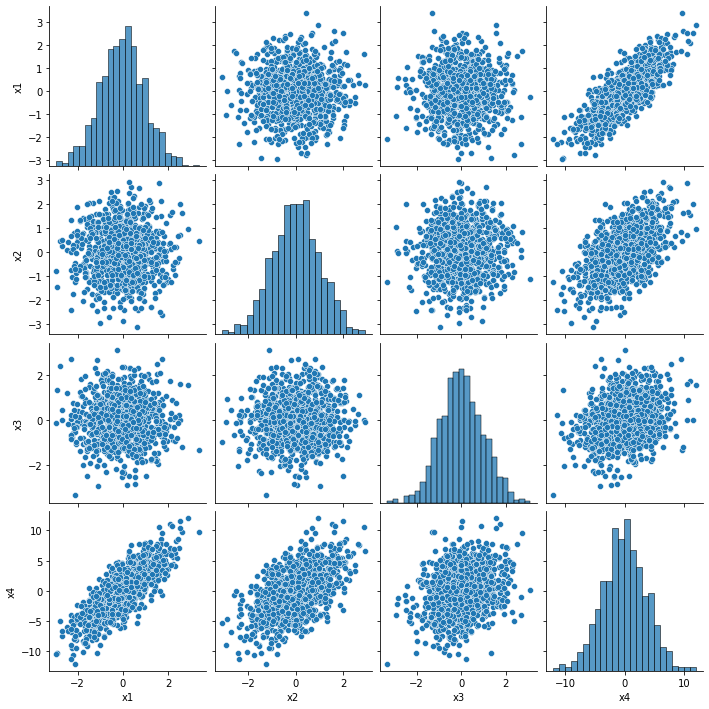

In [61]:
sns.pairplot(X)
plt.show()

## Single Linear Regression

,Model Coefficient
x1,34.734420
x2,68.634371
x3,59.395517
x4,20.923943


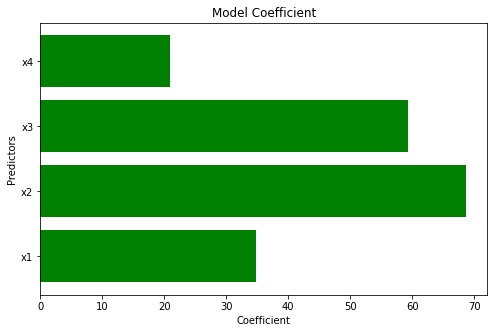

In [62]:
dg = pd.DataFrame(columns=["Model Coefficient"])
for col in X:
    lreg = LinearRegression().fit(X[[col]],y)
    dg.loc[col] = lreg.coef_
display(dg)

# Plotting the coefficients of each predictor
fig, ax = plt.subplots(figsize=(8,5))
ax.barh(dg.index,dg["Model Coefficient"],color="green")
plt.title(label="Model Coefficient")
# sns.barplot(data=dg.T, orient="h")
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.show()

## Multiple Regression

,Model Coefficients
x1,-24.609850
x2,27.717523
x3,37.666767
x4,19.272262


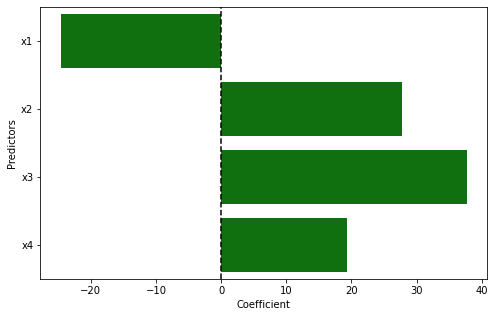

In [63]:
cols = ["x1","x2","x3","x4"]
lreg2 = LinearRegression().fit(X[cols],y)
ds = pd.DataFrame(index= X[cols].columns,data=lreg2.coef_,columns=["Model Coefficients"])
display(ds)
ax = plt.figure(figsize=(8,5))
sns.barplot(data=ds.T, orient='h', color='green')
plt.axvline(0,ls="--",c='k')
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.show()


## Removing ```x4``` due to multicolinearity

,Model Coefficients
x1,33.206935
x2,66.262046
x3,56.939029


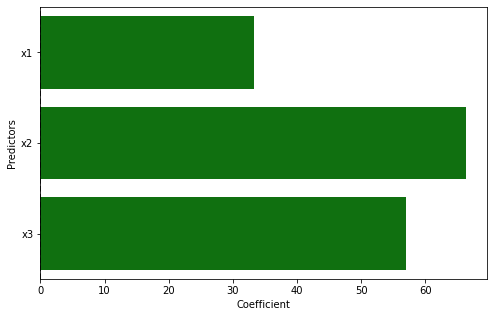

In [64]:
cols = ["x1","x2","x3"]
lreg2 = LinearRegression().fit(X[cols],y)
ds = pd.DataFrame(index= X[cols].columns,data=lreg2.coef_,columns=["Model Coefficients"])
display(ds)
ax = plt.figure(figsize=(8,5))
sns.barplot(data=ds.T, orient='h', color='green')
plt.axvline(0,ls="--",c='k')
plt.xlabel("Coefficient")
plt.ylabel("Predictors")
plt.show()
